<center style=" padding:10px">
<img src="https://ensam-casa.ma/assets/img/logoENsam.png" width="290" > 


</center>

<center>
<h3 style="color:green;font-weight:bold">
P157. Analyse et détection des menaces <br>
dans des environnements cloud 
<br>avec machine learning
</h3>

<br>

<h4 style="color:red"> GROUP ID : CS2C-7</h4>

✓ Problématique : Utiliser le machine learning pour détecter des menaces
potentielles dans des environnements cloud.
<br>
✓ Modèle : Utilisation d'algorithmes de machine learning pour l'analyse
des logs et des activités suspectes.

<br>
</center>
<center > Dans ce mini-projet on va utiliser Decesion Tree classifier and Random Forest Classifier </center>

<br>
<hr style="color:red">

<div style="text-align: center; font-weight: bold; font-size: 20px; background-color: grey; padding: 10px; color: white;">
  Importing Libraries
</div>



In this cell we will import all necessary libraries for our project

We will use the following libraries:

- **numpy** and **pandas**: Data manipulation.  
- **matplotlib** and **seaborn**: Visualization.  
- **sklearn**: Implementation of machine learning algorithms, performance evaluation, and data transformation.  
- **statsmodels**: Statistical analysis.  
- **mlxtend.plotting**: Creation of confusion matrices.

<br>
<center style="background-color:white; padding:10px">
<img src="https://tse3.mm.bing.net/th?id=OIP.7eqoHoO1aSWZI9McvkA4_gHaHa&pid=Api&P=0&h=180" width="150" > 
<img src="https://tse2.mm.bing.net/th?id=OIP.CMfBVcX4VozfYWR2Scu22AHaC_&pid=Api&P=0&h=180" width="150" > 
<img src="https://tse4.mm.bing.net/th?id=OIP.vBqgxaRdXcSFs6xhbzHl_QHaCe&pid=Api&P=0&h=180" width="150" > 
<img src="https://tse3.mm.bing.net/th?id=OIP.ckzi6TrdGgbbYBgrx23BMQHaHa&pid=Api&P=0&h=180" width="150" > 
<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" width="150" >
<img src="https://tse2.mm.bing.net/th?id=OIP.MPPv3cUzBPhzgPf_5OWnVgHaDR&pid=Api&P=0&h=180" width="150" >

</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix



<div style="text-align: center; font-weight: bold; font-size: 20px; background-color: grey; padding: 10px; color: white;">
  Loading Data
</div>



We import the dataset <br>
 KDDTrain+.txt : The full NSL-KDD train set including attack-type labels and difficulty level.
 <br>
 KDDTest+.txt : The full NSL-KDD test set including attack-type labels and difficulty level.

In [2]:
Trained_Data = pd.read_csv("KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("KDDTest+.txt" , sep = "," , encoding = 'utf-8')

Her we well explore and view the dataset , via .head we will see just the first 5 rows of  the dataset.

In [3]:
Trained_Data.head()


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
Tested_Data.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21



Her we well rename our dataset.columns to a significant name

In [5]:
# Modify Columns:

Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

# columns of the trained/tested data well get name from the columns wich we defined above
Trained_Data.columns = Columns 
Tested_Data.columns  = Columns


<div style="text-align: center; font-weight: bold; font-size: 20px; background-color: grey; padding: 10px; color: white;">
 Exploring Data
</div>


Her we well expore our dataset, also we will make sure that our dataset columns renamed with success

In [6]:
Trained_Data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


.info() is a pandas DataFrame method that displays a concise summary of a DataFrame, including:

- Total rows and columns <br>
- Column names and data types <br>
- Memory usage <br>
- Count of non-null values per column <br>
- Index type <br>

In [7]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

.describe() gives statistical summary of numerical columns including:
- count
- mean
- std (standard deviation)
- min
- 25% percentile
- 50% percentile (median)
- 75% percentile
- max

For categorical columns, it shows:
- count
- unique values
- top (most frequent value)
- frequency of top value

The output appears as a table with these statistics as rows and columns as variables.

In [8]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


.nunique() counts the number of unique values in each column of a pandas DataFrame/Series, excluding NULL values. It returns a Series showing the count of distinct values for each column.

In [9]:
Trained_Data.nunique() 

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

.max() returns the maximum value in each column such as for numerical columns it returns the highest number, for strings it returns the last value alphabetically.

In [10]:
Trained_Data.max()

duration                             42908
protocol_type                          udp
service                              whois
flag                                    SH
src_bytes                       1379963888
dst_bytes                       1309937401
land                                     1
wrong_fragment                           3
urgent                                   3
hot                                     77
num_failed_logins                        5
logged_in                                1
num_compromised                       7479
root_shell                               1
su_attempted                             2
num_root                              7468
num_file_creations                      43
num_shells                               2
num_access_files                         9
num_outbound_cmds                        0
is_host_login                            1
is_guest_login                           1
count                                  511
srv_count  

We well de the same things with tested data

In [11]:
Tested_Data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [12]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [13]:
Tested_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [14]:
Tested_Data.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [15]:
Tested_Data.max()

duration                          57715
protocol_type                       udp
service                           whois
flag                                 SH
src_bytes                      62825648
dst_bytes                       1345927
land                                  1
wrong_fragment                        3
urgent                                3
hot                                 101
num_failed_logins                     4
logged_in                             1
num_compromised                     796
root_shell                            1
su_attempted                          2
num_root                            878
num_file_creations                  100
num_shells                            5
num_access_files                      4
num_outbound_cmds                     0
is_host_login                         1
is_guest_login                        1
count                               511
srv_count                           511
serror_rate                         1.0


Utilise Seaborn pour créer un graphique en barres montrant la distribution des types d'attaques dans le jeu de données d'entraînement.
Les étiquettes des axes sont pivotées pour améliorer la lisibilité.

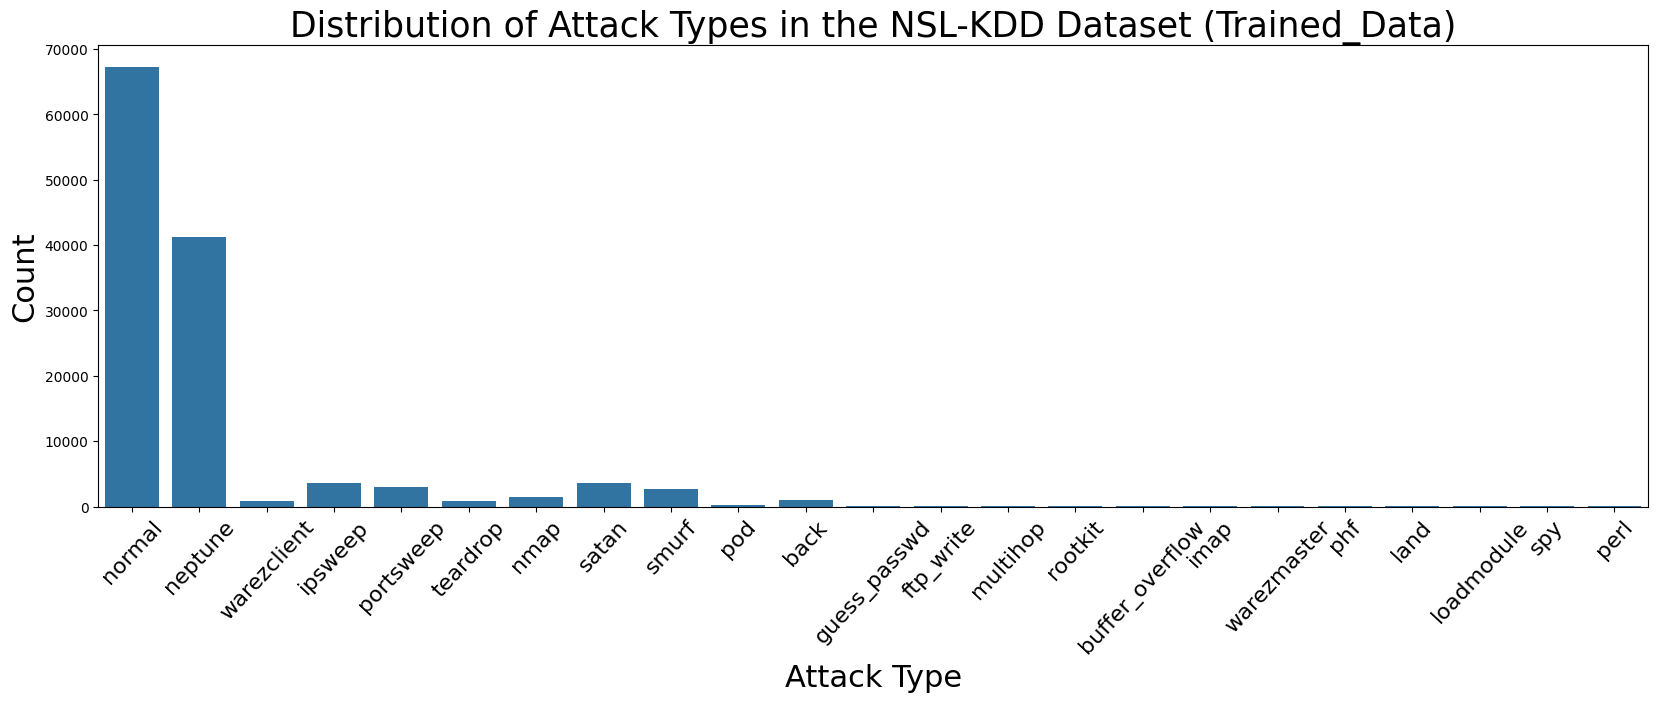

In [16]:

plt.figure(figsize=(20, 6)) # Set the figure size
sns.countplot(x='attack', data=Trained_Data) #plot the count of each attack ty^pe
plt.title('Distribution of Attack Types in the NSL-KDD Dataset (Trained_Data)', fontsize=25) # set the title
plt.xlabel('Attack Type', fontsize=22) #set the x-axis lable
plt.ylabel('Count', fontsize=22) # set the y-axis lable
plt.xticks(rotation=47, fontsize=16)   #rotate the x-axis labels for better redabelity
plt.show() #display the plot


Her well defined a function to analyze unique values and their counts for specified columns

In [17]:
def unique_values(df, columns):

    for columnName in columns:
        print(f"Column: {columnName}\n{'.'*30}") # Print column name with dotted line separator
        
        unique_vals = df[columnName].unique()  # Get array of unique values in column
        
        value_counts = df[columnName].value_counts()  # Get frequency distribution of values
         # Print unique values and their count
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
         # Print frequency distribution
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

cat_features = Trained_Data.select_dtypes(include='object').columns # Get columns with object (string) dtype
unique_values(Trained_Data, cat_features) # Apply the function defined above


Column: protocol_type
..............................
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
..............................
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

Get the disponibles values in attack column

In [18]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'normal', 'ipsweep', 'nmap', 'smurf', 'neptune', 'guess_passwd', 'loadmodule', 'buffer_overflow', 'teardrop', 'portsweep', 'land', 'phf', 'multihop', 'back', 'rootkit', 'perl', 'warezclient', 'satan', 'spy', 'imap', 'warezmaster', 'ftp_write', 'pod'} 

Transforming attack types into a binary classification simplifies machine learning tasks, especially for supervised models.
This allows training a model to distinguish normal behavior (0) from malicious behavior (1).

In [19]:
# Convert attack labels to binary (0 for normal, 1 for attack)
Trained_attack = Trained_Data.attack.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = Tested_Data.attack.map(lambda a: 0 if a == 'normal' else 1)

# Add new binary attack_state column to both datasets 
Trained_Data['attack_state'] = Trained_attack
Tested_Data['attack_state'] = Tested_attack



In [20]:
Trained_attack

0         0
1         1
2         0
3         0
4         1
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: attack, Length: 125972, dtype: int64

In [21]:
Tested_attack

0        1
1        0
2        1
3        1
4        0
        ..
22538    0
22539    0
22540    1
22541    0
22542    1
Name: attack, Length: 22543, dtype: int64



<div style="text-align: center; font-weight: bold; font-size: 20px; background-color: grey; padding: 10px; color: white;">
 Data Cleaning
</div>


.isnull().sum() counts the number of NULL/missing values in each column of a DataFrame. 
It returns a Series showing the count of missing values per column.

In [22]:
Trained_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [23]:
Tested_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

 counts duplicate rows in the training/testing dataset

In [24]:
print(" Trained_Data duplicated : ",Trained_Data.duplicated().sum())
print(" Tested_Data duplicated : ",Tested_Data.duplicated().sum())

 Trained_Data duplicated :  0
 Tested_Data duplicated :  0


print the dimensions (rows, columns) of both datasets using the .shape 

In [25]:
print("Trained_Data.shape : ",Trained_Data.shape)
print("Tested_Data.shape : ",Tested_Data.shape)

Trained_Data.shape :  (125972, 44)
Tested_Data.shape :  (22543, 44)


pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

- Purpose:
This transformation is often necessary for machine learning models because many models (e.g., logistic regression, decision trees) cannot handle categorical data directly and require numerical input. By converting categories to binary columns, the data is in a format suitable for modeling.

Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

In [26]:
Trained_Data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,0
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,0
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1


after applying the pd.get_dummies

In [27]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [28]:
Trained_Data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
3,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
125968,8,105,145,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
125969,0,2231,384,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
125970,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


using Label Encoding to convert categorical labels into numerical values. Specifically, the LabelEncoder() from sklearn.preprocessing is being used to encode the attack column in both Trained_Data and Tested_Data

In [29]:
Trained_Data['attack']

0          normal
1         neptune
2          normal
3          normal
4         neptune
           ...   
125967    neptune
125968     normal
125969     normal
125970    neptune
125971     normal
Name: attack, Length: 125972, dtype: object

In [30]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])

.get_dummies is one-hot encoding 
.LabelEncoder is incremental encoding, such as 0,1,2,3,4,..
and her just we use both method , but we can apply get_dummies for both , also for labelEncoder

<hr>

X_train and X_test contain the feature columns (input data for the model), which exclude the target column (attack_state). <br>
Y_train and Y_test contain the target column (attack_state) that the model will try to predict

In [31]:
# These lines remove the columns 'attack', 'level', and 'attack_state' from the Trained_Data 

# features of traindata
X_train = Trained_Data.drop('attack', axis = 1)
X_train = Trained_Data.drop('level', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

# features of testdata
X_test = Tested_Data.drop('attack', axis = 1)
X_test = Tested_Data.drop('level', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)

# set target of traindata/setdata
Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']



In [32]:
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
3,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
125968,8,105,145,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
125969,0,2231,384,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
125970,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [33]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,2,12983,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,20,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,1,0,15,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
4,0,267,14515,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,794,333,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
22539,0,317,938,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
22540,0,54540,8314,0,0,0,2,0,1,1,...,False,False,False,False,False,False,False,False,True,False
22541,0,42,42,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [34]:
Y_train

0         0
1         1
2         0
3         0
4         1
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: attack_state, Length: 125972, dtype: int64

In [35]:
Y_test

0        1
1        0
2        1
3        1
4        0
        ..
22538    0
22539    0
22540    1
22541    0
22542    1
Name: attack_state, Length: 22543, dtype: int64

- The train_test_split function from sklearn.model_selection is used to split data into training and testing sets.
<br/>
- X_train and X_test are the feature datasets, while Y_train and Y_test are the corresponding labels (target variables).
<br/>
- The argument test_size=0.25 means that 25% of the data will be used for testing, and the remaining 75% will be used for training.
<br/>
- random_state=42 ensures that the split is reproducible.

In [36]:
X_train_train,X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common preprocessing for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, using the median and the interquartile range often give better results.

In [37]:
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test= Ro_scaler.transform(X_test_test)

X_train_train

array([[ 0.00000000e+00,  5.68840580e-01,  2.38301887e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.28985507e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.30434783e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.07608696e+00,  5.30188679e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  7.24637681e-03,  2.11320755e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  7.46376812e-01,  2.94018868e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
      shape=(94479, 124))

In [38]:
print("X_train_train.shape, Y_train_train.shape : ",X_train_train.shape, Y_train_train.shape)
print("X_test_train.shape, Y_test_train.shape : ",X_test_train.shape, Y_test_train.shape)
print("X_train_test.shape, Y_train_test.shape :",X_train_test.shape, Y_train_test.shape)
print("X_test_test.shape, Y_test_test.shape :",X_test_test.shape, Y_test_test.shape)

X_train_train.shape, Y_train_train.shape :  (94479, 124) (94479,)
X_test_train.shape, Y_test_train.shape :  (31493, 124) (31493,)
X_train_test.shape, Y_train_test.shape : (16907, 118) (16907,)
X_test_test.shape, Y_test_test.shape : (5636, 118) (5636,)


Evaluate the performance of a machine learning model by computing various metrics and visualizing the results.

Parameters:
- Model_Name (str): The name of the model being evaluated.
- Model_Abb: The trained machine learning model instance to be evaluated.
- X_test: The test feature data (input variables) for evaluation.
- Y_test: The true labels (ground truth) corresponding to the test data.

Outputs:
- Prints various evaluation metrics for the model, including:
- Accuracy
- Sensitivity (Recall)
- Precision
- F1 Score
- Recall
- Displays the confusion matrix for the model's predictions.
- Displays the ROC (Receiver Operating Characteristic) curve.

Steps:
1. The model is used to predict values based on the provided test data (`X_test`).
2. Key evaluation metrics are computed:
        - Accuracy: Proportion of correctly predicted instances.
        - Sensitivity (Recall): Proportion of actual positive instances correctly identified.
        - Precision: Proportion of predicted positive instances that are actually positive.
        - F1 Score: The harmonic mean of precision and recall.
        - Recall: Same as sensitivity.
3. Metrics are printed in a readable format.
4. A confusion matrix is a table used to evaluate the performance of a classification model. It compares the actual target values with the predicted values from the model, providing insights into how well the model is performing.
5. An ROC curve is plotted to evaluate the model's performance at various classification thresholds.
   


In [39]:


def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    # Predictions and metrics
    Pred_Value = Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test, Pred_Value)
    Sensitivity = metrics.recall_score(Y_test, Pred_Value)
    Precision = metrics.precision_score(Y_test, Pred_Value)
    F1_score = metrics.f1_score(Y_test, Pred_Value)
    Recall = metrics.recall_score(Y_test, Pred_Value)
    
    # Display Metrics
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy, 3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity, 3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision, 3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score, 3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall, 3)))
    print('--------------------------------------------------\n')
    
    # Confusion Matrix
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    fig, ax = plot_confusion_matrix(conf_mat=Confusion_Matrix,
                                    class_names=['Normal', 'Attack'],
                                    colorbar=True)
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_estimator(Model_Abb, X_test, Y_test)
    plt.show()





<div style="text-align: center; font-weight: bold; font-size: 20px; background-color: green; padding: 10px; color: white;">
 DecisionTreeClassifier
</div>


This creates an instance of the DecisionTreeClassifier. <br>
max_features=6: This parameter limits the number of features that can be used for splitting a node in the tree to 6. This can help prevent overfitting by reducing the complexity of the tree. <br>
max_depth=4: This limits the depth of the decision tree to 4 levels. Limiting the depth also helps prevent the tree from growing too complex and overfitting the training data.

In [40]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

The score() method is used to evaluate the accuracy of the model on the provided data.

In [41]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.8668910551551139, 0.8639697710602356)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.864

The Decision Tree Classifier Model Sensitvity = 0.76

The Decision Tree Classifier Model Precision  = 0.939

The Decision Tree Classifier Model F1 Score   = 0.84

The Decision Tree Classifier Model Recall     = 0.76

--------------------------------------------------



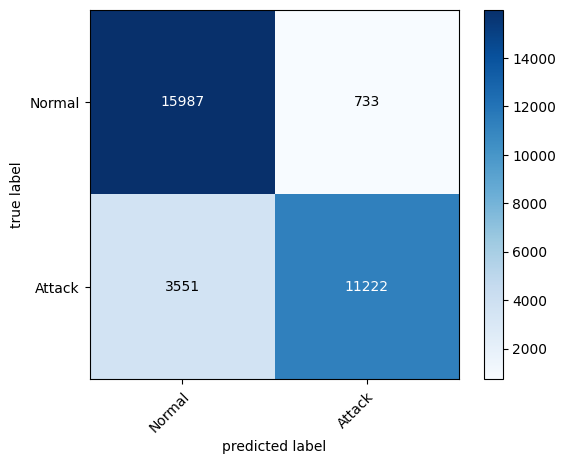

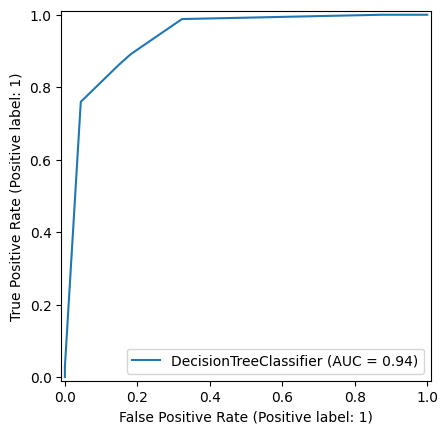

In [42]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

In [1]:
print("Over All Score:",( 0.864+0.76+0.939+0.84+0.76)/5.0)

Over All Score: 0.8326


visualize the structure of the trained decision tree.

[Text(0.5576923076923077, 0.9, 'x[29] <= 0.027\ngini = 0.497\nsamples = 94479\nvalue = [50622, 43857]'),
 Text(0.3076923076923077, 0.7, 'x[30] <= -0.447\ngini = 0.31\nsamples = 48344\nvalue = [9282, 39062]'),
 Text(0.4326923076923077, 0.8, 'True  '),
 Text(0.15384615384615385, 0.5, 'x[27] <= 0.19\ngini = 0.19\nsamples = 37417\nvalue = [3982, 33435]'),
 Text(0.07692307692307693, 0.3, 'x[87] <= 0.5\ngini = 0.183\nsamples = 37181\nvalue = [3778, 33403]'),
 Text(0.038461538461538464, 0.1, 'gini = 0.119\nsamples = 34284\nvalue = [2183, 32101]'),
 Text(0.11538461538461539, 0.1, 'gini = 0.495\nsamples = 2897\nvalue = [1595, 1302]'),
 Text(0.23076923076923078, 0.3, 'x[22] <= 0.32\ngini = 0.234\nsamples = 236\nvalue = [204, 32]'),
 Text(0.19230769230769232, 0.1, 'gini = 0.081\nsamples = 213\nvalue = [204, 9]'),
 Text(0.2692307692307692, 0.1, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.46153846153846156, 0.5, 'x[57] <= 0.5\ngini = 0.5\nsamples = 10927\nvalue = [5300, 5627]'),
 Text(0.3

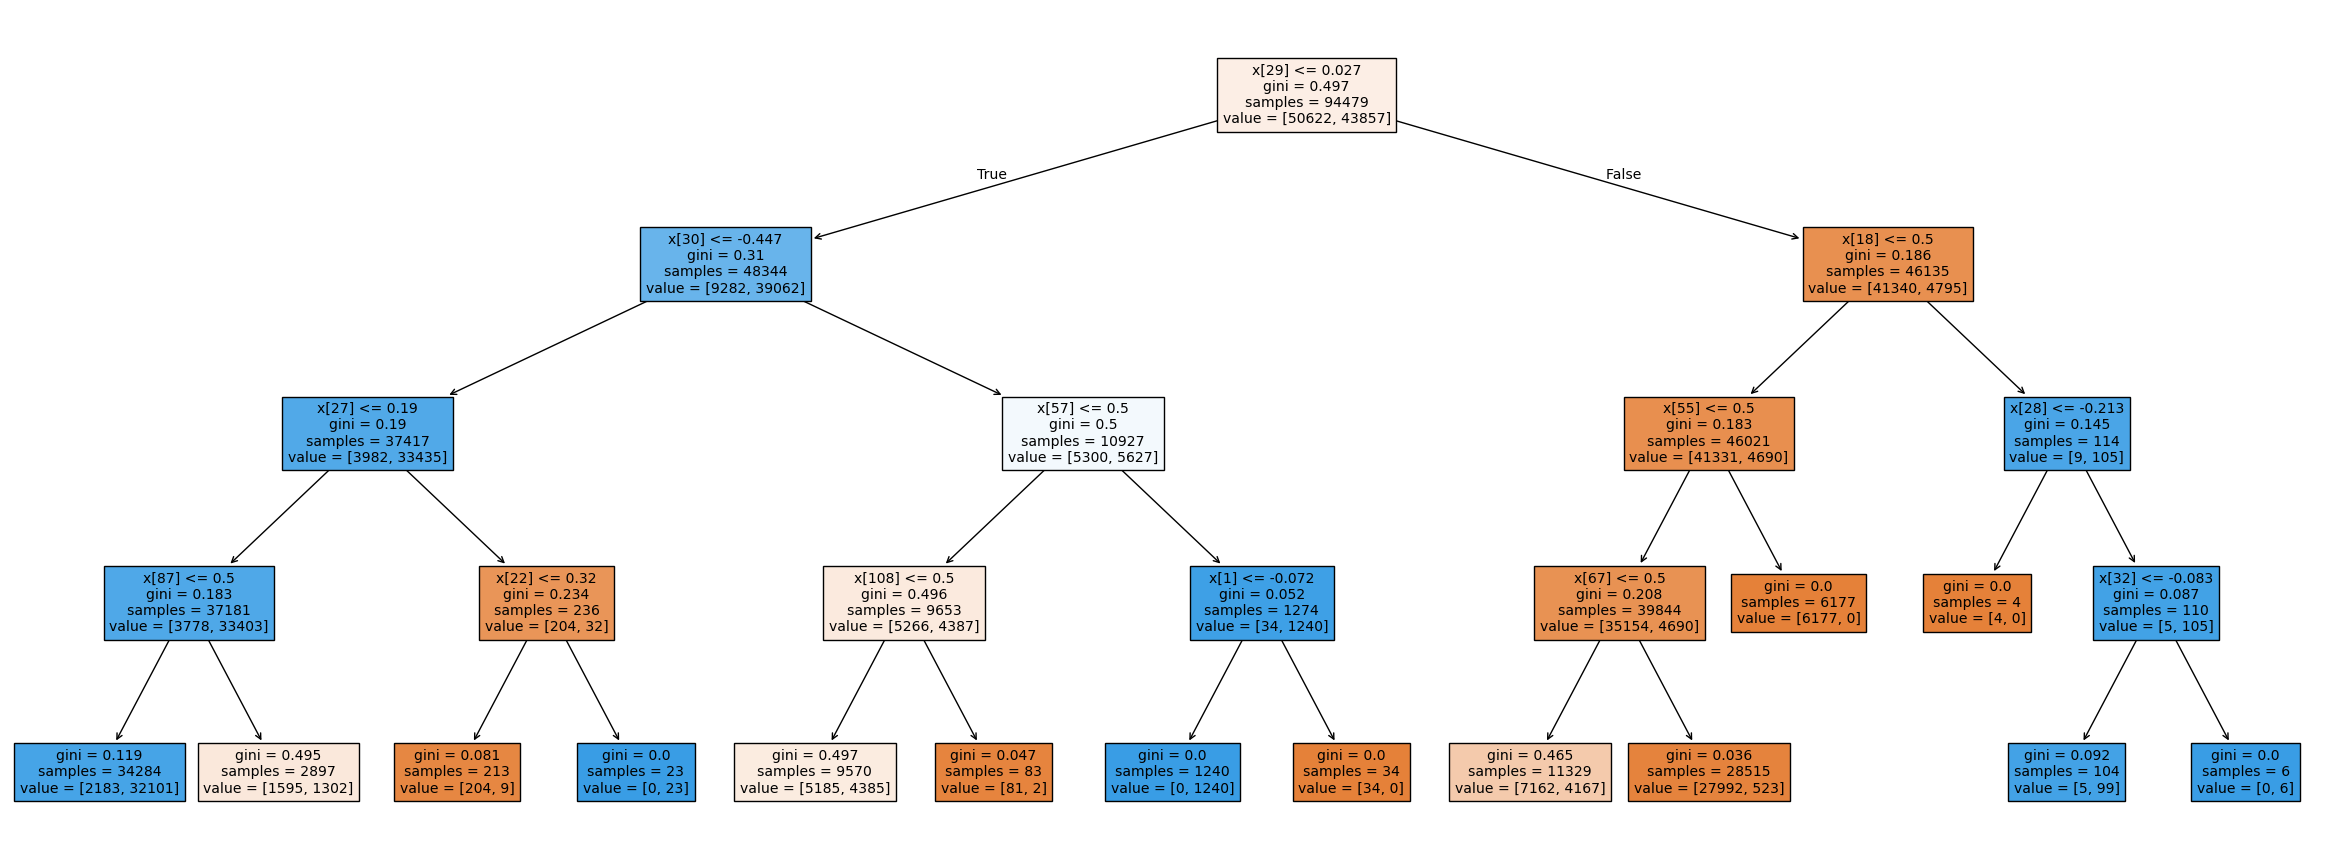

In [55]:
fig = plt.figure(figsize=(30,11))
tree.plot_tree(DT, filled=True)




<div style="text-align: center; font-weight: bold; font-size: 20px; background-color: green; padding: 10px; color: white;">
 RandomForestClassifier
</div>



In [45]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1) # Create a GridSearchCV object with cross-validation and parallelization
    ## Fit the model using the training data and parameter grid
    Grid_Result = Grid.fit(X_train, Y_train)
     # Get the best model (with the optimal hyperparameters)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

GridSearchCV: It performs an exhaustive search over a specified parameter grid (Parameters) using cross-validation (cv=3).
param_grid=Parameters: The hyperparameters to be tuned.
n_jobs=-1: Uses all available CPU cores for parallel computation.
best_estimator_: After fitting, it returns the model with the best hyperparameters from the search.

max_depth: This parameter controls the maximum depth of the individual decision trees in the random forest. It limits how deep the tree can grow, which helps prevent overfitting. Testing multiple values for max_depth allows the grid search to find the optimal depth for the model.<br>
Parameters: This is the dictionary specifying the hyperparameter values to search over during grid search. In this case, you're only tuning the max_depth parameter.

In [4]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30]

Parameters = {'max_depth': max_depth}

Parameters


{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30]}

In [47]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train_train, Y_train_train)

RandomForestClassifier(max_depth=13)

In [48]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [49]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(1.0, 0.9999682469120122)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Sensitvity = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

The Random Forest Classifier Model Recall     = 1.0

--------------------------------------------------



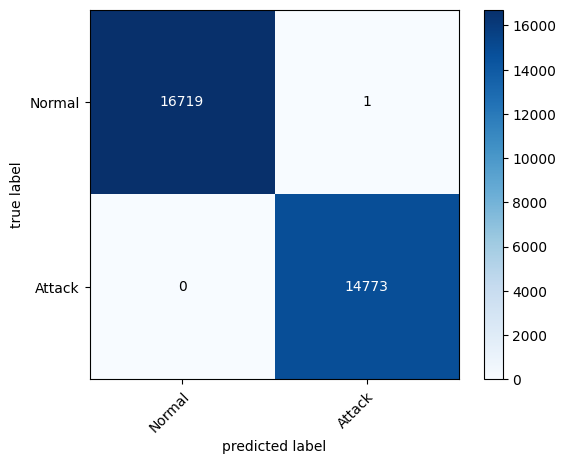

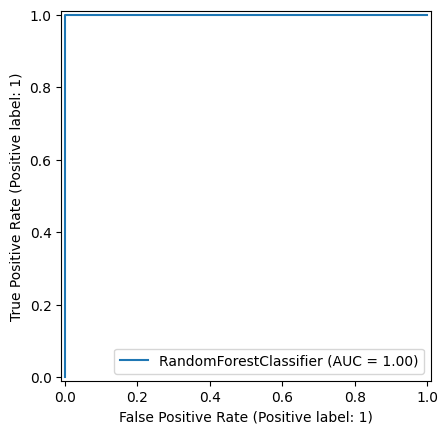

In [50]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

<hr>
<hr>
<hr>

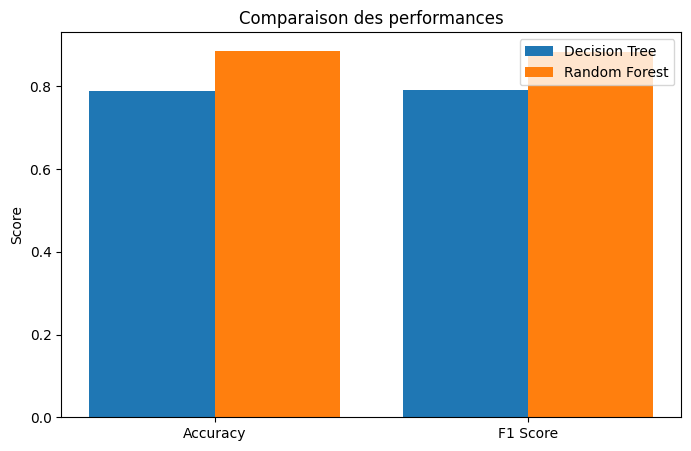

In [3]:


# Génération d'un jeu de données synthétique
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement des modèles
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Prédictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Calcul des métriques
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

dt_f1 = f1_score(y_test, dt_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Affichage des résultats
metrics = ['Accuracy', 'F1 Score']
dt_scores = [dt_accuracy, dt_f1]
rf_scores = [rf_accuracy, rf_f1]

x = range(len(metrics))

plt.figure(figsize=(8, 5))
plt.bar(x, dt_scores, width=0.4, label='Decision Tree', align='center')
plt.bar([p + 0.4 for p in x], rf_scores, width=0.4, label='Random Forest', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Comparaison des performances')
plt.legend()
plt.show()
